### Sheikh-Sedat Touray
### DSP 566
### Assignment 1
### Summer 2024 

# 1. Linear Regression of the Cars Data

In [487]:
#Import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [488]:
# upload data as a data frame and view 5 observations 
df = pd.read_csv("cars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [490]:
#Drop the car type column
df = df.drop("Unnamed: 0", axis=1)
# Examnine the mean to be able to do a quick check to see how my predictions are doing
df["mpg"].mean()

20.090625000000003

### Unscaled Data Regression 

In [491]:
# Define the class for the linear regression 
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=20, random_state=1):
        self.eta = eta        # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state  # Seed for random number generation

    def fit(self, X, y):
        """Fit training data."""

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.cost_ = []
        
        #Full batch gradient descent
        for i in range(self.n_iter):
            # Compute predictions
            y_pred = self.net_input(X)
            
            # Compute gradients and Update weights and bias
            errors = y - y_pred
            self.w_ += self.eta * X.T.dot(errors) / len(y)
            self.b_ += self.eta * errors.mean()
            cost = (errors**2).sum() / (2.0 * len(y))
            self.cost_.append(cost)
            # Print cost every 8 iterations
            if i % 16 == 0:
                print(f"Iteration {i}, Cost: {cost}")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return continuous output"""
        return self.net_input(X)

In [492]:
# split the data into the target and predictors 
X = df.drop("mpg", axis=1).values
y = df["mpg"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [493]:
#Define the model and fit it to train set 
lin_reg = LinearRegressionGD(eta=0.01, n_iter=20)
lin_reg.fit(X_train, y_train)

#Predict on train
predictions3 = lin_reg.predict(X_train)
print("Linear Regression Predictions:", predictions3)

#Predict on new case (unseen data)
predictions4 = lin_reg.predict(X_test)
print("Linear Regression Predictions:", predictions4)

# Calculate the mean squared error on the train set
mse3 = ((y_train - predictions3) ** 2).mean()
print("Mean Squared Error on Train Set:", mse3)

# Calculate the mean squared error on the test set
mse4 = ((y_test - predictions4) ** 2).mean()
print("Mean Squared Error on Test Set:", mse4)


Iteration 0, Cost: 273.97932951761663
Iteration 16, Cost: 2.5005709508134284e+98
Linear Regression Predictions: [-3.23520020e+61 -2.43782288e+61 -1.43911215e+61 -7.07102338e+60
 -3.76568104e+61 -6.85015624e+60 -3.21803001e+61 -2.43777815e+61
 -3.15522820e+61 -3.19695272e+61 -3.19806280e+61 -2.49780442e+61
 -1.53802954e+61 -1.04328234e+61 -1.19079063e+61 -1.26204279e+61
 -1.11577840e+61 -3.66206139e+61 -7.60173505e+60 -7.58514502e+60
 -1.43889423e+61 -3.72927930e+61 -2.94608458e+61 -1.59746443e+61
 -1.53781702e+61]
Linear Regression Predictions: [-1.13877416e+61 -1.16967606e+61 -1.82806733e+61 -1.04692860e+61
 -2.05417436e+61 -2.58542143e+61 -2.43796840e+61]
Mean Squared Error on Train Set: 5.536756845467748e+122
Mean Squared Error on Test Set: 3.421509217148715e+122


In [494]:
# Access loss history
print("Loss history:", lin_reg.cost_)

Loss history: [273.97932951761663, 170746581.2747234, 175140758470873.28, 1.796527176804115e+20, 1.842809149414101e+26, 1.8902834340713555e+32, 1.9389807470082532e+38, 1.9889325957700603e+44, 2.0401712995966082e+50, 2.0927300103330975e+56, 2.1466427338796045e+62, 2.2019443521931615e+68, 2.258670645856664e+74, 2.3168583172291865e+80, 2.3765450141926983e+86, 2.4377693545105426e+92, 2.5005709508134284e+98, 2.564990436229117e+104, 2.6310694906723803e+110, 2.6988508678122287e+116]


In [495]:



# Define the class for the linear regression without the bias 

class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta        # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state  # Seed for random number generation

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.05, size=X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            # Compute predictions
            y_pred = self.net_input(X)
            
            # Compute gradients and Update weights
            errors = y - y_pred
            self.w_ += self.eta * X.T.dot(errors) / len(y)
            
            # Compute cost (MSE)
            cost = (errors**2).sum() / (2.0 * len(y))
            self.cost_.append(cost)
            
            # Print cost every 16 iterations
            if i % 16 == 0:
                print(f"Iteration {i}, Cost: {cost}")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_)

    def predict(self, X):
        """Return continuous output"""
        return self.net_input(X)
    
    


# Initialize and train the model
model = LinearRegressionGD(eta=0.01, n_iter=20, random_state=1)
model.fit(X_train, y_train)

# Make predictions
y_predcar2 = model.predict(X_test)

# Make predictions
y_predcar1 = model.predict(X_train)

# Print first few predictions
print("First few predictions:", y_predcar[:5])

# Calculate the mean squared error on the train set
mse1 = ((y_train - y_predcar1) ** 2).mean()
print("Mean Squared Error on Train Set:", mse1)

# Calculate the mean squared error on the test set
mse2 = ((y_test - y_predcar2) ** 2).mean()
print("Mean Squared Error on Test Set:", mse2)


Iteration 0, Cost: 551.3615589955812
Iteration 16, Cost: 6.488415784781767e+98
First few predictions: [-1.83429488e+61 -1.88407153e+61 -2.94460296e+61 -1.68635078e+61
 -3.30881440e+61]
Mean Squared Error on Train Set: 1.4365725447972076e+123
Mean Squared Error on Test Set: 8.87743400776647e+122


The unscaled data was not converging and I had to carefully choose the learning rate and the number of iterations because if the learning rate is too high it leads nan values and if the number of iterations is too high it leads to inf values. So I had to choose a low learning rate and and a low number of iterations and it was still performing poorly. It did not matter with or without the bias it did not affect my results they have exactly the same MSEs on the test and training. It only gave a higher cost. 

### Scaled Data Regression 

In [496]:

X = df.drop("mpg", axis=1).values
y = df["mpg"].values
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class LinearRegressionGD:
    def __init__(self, eta=0.12, n_iter=100, random_state=1):
        self.eta = eta        # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state  # Seed for random number generation

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.05, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.cost_ = []
        
        # Full batch gradient descent
        for i in range(self.n_iter):
            # Compute predictions
            y_pred = self.net_input(X)
            
            # Compute gradients and Update weights and bias
            errors = y - y_pred
            self.w_ += self.eta * X.T.dot(errors) / len(y)
            self.b_ += self.eta * errors.mean()
            cost = (errors**2).sum() / (2.0 * len(y))
            self.cost_.append(cost)
            # Print cost every 16 iterations
            if i % 16 == 0:
                print(f"Iteration {i}, Cost: {cost}")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return continuous output"""
        return self.net_input(X)

# Initialize and fit the model
model = LinearRegressionGD(eta=0.12, n_iter=100, random_state=1)
model.fit(X_train_scaled, y_train)

# Make predictions on the train set
predictionst = model.predict(X_train_scaled)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)
print("Predictions:", predictions)

# Print the final weights
print("Weights:", model.w_)
print("Bias:", model.b_)

# Calculate the mean squared error on the train set
msetn = ((y_train - predictionst) ** 2).mean()
print("Mean Squared Error on Train Set:", msetn)

# Calculate the mean squared error on the test set
msett = ((y_test - predictions) ** 2).mean()
print("Mean Squared Error on Test Set:", msett)

Iteration 0, Cost: 231.10569014150485
Iteration 16, Cost: 6.047025526681161
Iteration 32, Cost: 2.496487348234512
Iteration 48, Cost: 2.3971281301495218
Iteration 64, Cost: 2.3678537044525583
Iteration 80, Cost: 2.346573603203118
Iteration 96, Cost: 2.330040469082945
Predictions: [22.14190714 19.67889112 26.15453051 17.17829964 11.61698806 15.75483479
 18.83812707]
Weights: [-0.35539802 -0.47023782 -0.64722907  0.56336913 -1.59098247  0.66675844
  0.40628303  1.85679508  0.02019162 -1.21314122]
Bias: 20.535942352155846
Mean Squared Error on Train Set: 4.652962328931561
Mean Squared Error on Test Set: 6.442833432716475


In [497]:
# Calculate the mean squared error on the test set
mse = ((y_test - predictions) ** 2).mean()
print("Mean Squared Error on Test Set:", mse)

# Print a few predictions to check how the model works
print("Actual MPG values:", y_test[:5])
print("Predicted MPG values:", predictions[:5])

Mean Squared Error on Test Set: 6.442833432716475
Actual MPG values: [24.4 19.7 21.4 15.2 10.4]
Predicted MPG values: [22.14190714 19.67889112 26.15453051 17.17829964 11.61698806]


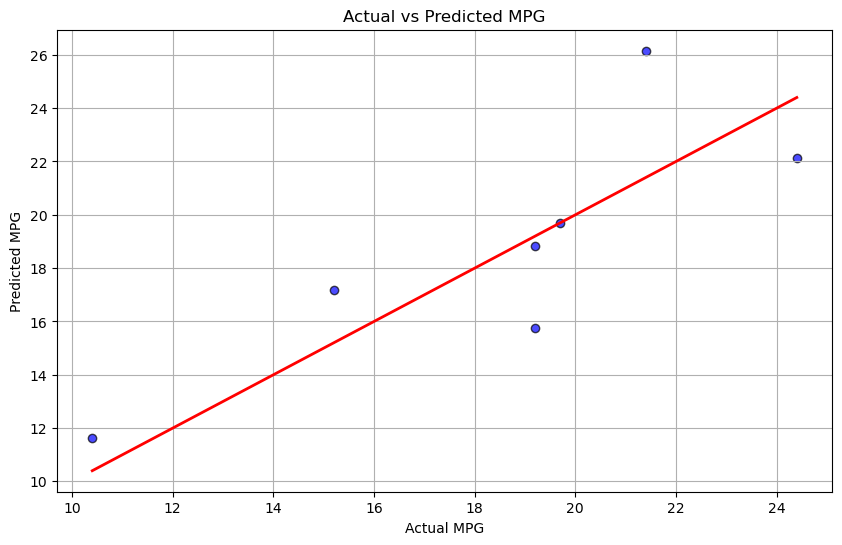

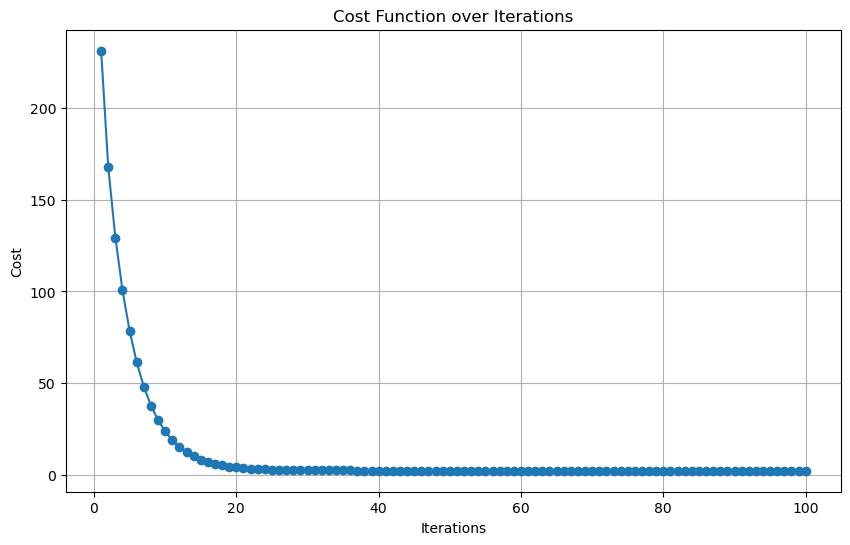

In [498]:

# Plot the predicted vs actual MPG values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.grid(True)
plt.show()

# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, model.n_iter + 1), model.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

### Sk learn method Regression 

In [499]:
#Import libraries 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [500]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_scaled)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))



Coefficients: 
 [-0.08947505  0.71320507 -0.59854114  0.5321993  -2.88972752  1.72323624
  0.16119722  2.34203831 -0.23581956 -0.80473128]
Mean squared error: 6.80
Coefficient of determination: 0.61


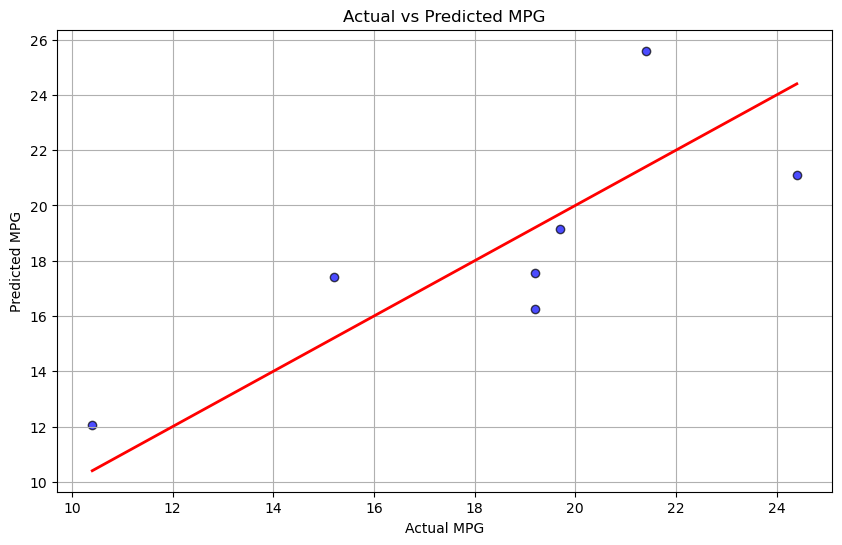

In [501]:
# Plot the predicted vs actual MPG values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.grid(True)
plt.show()

As can be seen by comparing both models MSEs, my algorithm performed better than the SkLearn linear model. 

# 2. Logistic Regression of the Breast Cancer Data

In [527]:
# Import libraries 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

#load cancer data
cancer = load_breast_cancer()

In [528]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

#print shape to see number of observations and columns
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [529]:
# Split into training and testing sets
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [530]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=100, random_state=3):
        self.eta = eta        # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state  # Seed for random number generation

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.cost_ = []
        
        # Full batch gradient descent
        for i in range(self.n_iter):
            # Compute predictions
            y_pred = self.sigmoid(self.net_input(X))
            
            # Compute gradients and update weights and bias
            errors = y - y_pred
            self.w_ += self.eta * X.T.dot(errors) / len(y)
            self.b_ += self.eta * errors.mean()
            cost = -y.dot(np.log(y_pred)) - ((1 - y).dot(np.log(1 - y_pred)))
            self.cost_.append(cost)
            
            # Print cost every 8 iterations
            if i % 8 == 0:
                #print(f"Iteration {i}, Cost: {cost}")
                return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def sigmoid(self, z):
        """Compute the sigmoid function"""
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        """Return probability estimates for the positive class"""
        return self.sigmoid(self.net_input(X))

    def predict(self, X):
        """Return class label after thresholding at 0.5"""
        return np.where(self.predict_proba(X) >= 0.5, 1, 0)

In [531]:
# Create logistic regression object
log_regr = LogisticRegressionGD(eta=1e-5, n_iter=100, random_state=5)

# Train the model using the training sets
log_regr.fit(X_can_train, y_can_train)

# Make predictions using the testing set
y_can_pred = log_regr.predict(X_can_test)

# Calculate accuracy and ROC AUC score
accuracy = accuracy_score(y_can_test, y_can_pred)
roc_auc = roc_auc_score(y_can_test, log_regr.predict(X_can_test))

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.58
ROC AUC: 0.50


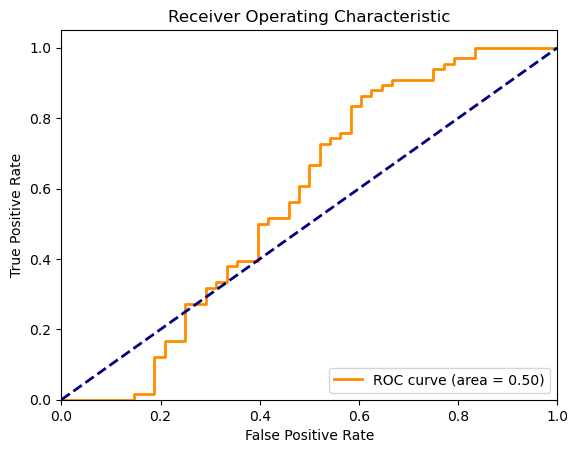

In [533]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_can_test, log_regr.sigmoid(log_regr.net_input(X_can_test)))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

For the unscaled data the model was performing very poorly and I was have trouble making it converge until when I significantly reduced the learning rate it converged. Also the accuracy decreases as I decrease the number of epochs. current it shows 58 percent but when I decrease the number of iterations to 50 the accuracy also decreases to about 38%. However, when I increased the number of interations to 1000, the accuracy also went up to 96%. However, I believe that at that point it might be overfitting because when I observed the cost over iteration plot, it seemed to have had a lot of noise. And the AUC area under the curve is not good but average. 

In [525]:
set.seed(1)
#print metrics 
print("\nClassification Report:")
print(classification_report(y_can_test, y_can_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_can_test, y_can_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        43
           1       0.63      1.00      0.78        71

    accuracy                           0.64       114
   macro avg       0.82      0.52      0.43       114
weighted avg       0.77      0.64      0.52       114


Confusion Matrix:
[[ 2 41]
 [ 0 71]]


In [517]:
class LogisticRegressionGD:
    def __init__(self, eta=0.1, n_iter=100, random_state=11):
        self.eta = eta        # Learning rate
        self.n_iter = n_iter  # Number of iterations
        self.random_state = random_state  # Seed for random number generation

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.cost_ = []
        
        # Full batch gradient descent
        for i in range(self.n_iter):
            # Compute predictions
            y_pred = self.sigmoid(self.net_input(X))
            
            # Compute gradients and update weights and bias
            errors = y - y_pred
            self.w_ += self.eta * X.T.dot(errors) / len(y)
            self.b_ += self.eta * errors.mean()
            cost = -y.dot(np.log(y_pred)) - ((1 - y).dot(np.log(1 - y_pred)))
            self.cost_.append(cost)
            
            # Print cost every 8 iterations
            if i % 8 == 0:
                #print(f"Iteration {i}, Cost: {cost}")
                return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def sigmoid(self, z):
        """Compute the sigmoid function"""
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        """Return probability estimates for the positive class"""
        return self.sigmoid(self.net_input(X))

    def predict(self, X):
        """Return class label after thresholding at 0.5"""
        return np.where(self.predict_proba(X) >= 0.5, 1, 0)

In [520]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# Split into training and testing sets
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled_can = scaler.fit_transform(X_can_train)
X_test_scaled_can = scaler.transform(X_can_test)

# Create logistic regression object
log_regrs = LogisticRegressionGD(eta=0.1, n_iter=100)
# Train the model using the training sets
log_regrs.fit(X_train_scaled_can, y_can_train)

# Make predictions using the testing set
Scalcan_y_pred = log_regrs.predict(X_test_scaled_can)

# Calculate accuracy and ROC AUC score
scan_accuracy = accuracy_score(y_can_test, Scalcan_y_pred)
scan_roc_auc = roc_auc_score(y_can_test, log_regrs.predict_proba(X_test_scaled_can))

print(f"Accuracy: {scan_accuracy:.2f}")
print(f"ROC AUC: {scan_roc_auc:.2f}")

Accuracy: 0.96
ROC AUC: 1.00


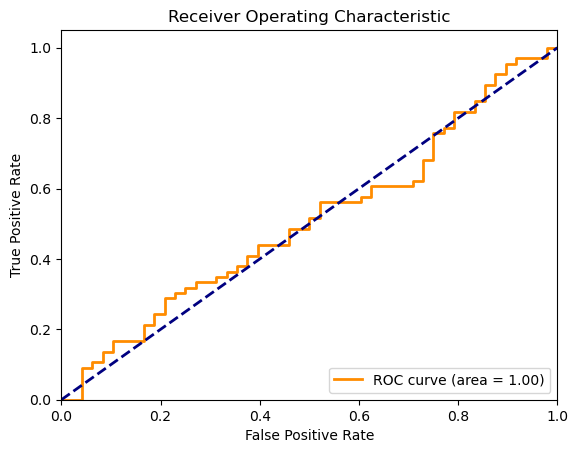

In [534]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_can_test, log_regr.sigmoid(log_regr.net_input(X_test_scaled_can)))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {scan_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [521]:
set.seed(2)
#print metrics 
print("\nClassification Report:")
print(classification_report(y_can_test, Scalcan_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_can_test, Scalcan_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[41  2]
 [ 2 69]]


There are some algorithms that require data to be scaled and it seemed like logistic and linear regressions are part of that group.

when the cancer data scaled my logistic regression model worked almost perfectly with a 96 percent accuracy and an oustanding AUC of 1.0. With 2 false positives and 2 false negatives. Meaning it misclassified only two people out of 114 people to have cancer while they dont and only two people to not have cancer when they really do have cancer. This is an exceptional result however, I would like it to perform much better since those false negative cases if not caught quickly could potentially be fatal to the patients than If caught quickly which would allow for less damage and quicker action to cure the patients. 
But since this is just practice, I am happy with the results. The AUC plots also show how well the model fits the scaled data. 

In [522]:
#Define the model
modelogr = LogisticRegression()

#fit it on train data
modelogr.fit(X_train_scaled_can, y_can_train)

#predit on unseen data
skt_y_pred = modelogr.predict(X_test_scaled_can)
#compute accuracy 
skt_accuracy = accuracy_score(y_can_test, skt_y_pred)
set.seed(3)

#print metrics
print("Accuracy:", skt_accuracy)
print("\nClassification Report:")
print(classification_report(y_can_test, skt_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_can_test, skt_y_pred))

Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  2]
 [ 1 70]]


The Scikit learn model performed just as well as my algorithm with the same accuracy and 2 false positives and 1 false negative. 